In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
passes_players = pd.read_csv('passes_players.csv')
passes_players.head(5)

,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,id,...,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,Success,player_name
0,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,...,65.0,Kick Off,40.0,Right Foot,53.9,39.6,61.0,40.1,True,Rachel Williams
1,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,71905fc2-e4fb-4429-8f44-11c3942ade7d,...,NaN,NaN,40.0,Right Foot,118.4,72.9,52.8,42.7,True,Lucy Staniforth
2,30,Pass,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,7c8f43bb-78d6-421b-a485-c8ddb83e7b1d,...,63.0,Goal Kick,38.0,Left Foot,13.4,54.2,6.0,44.0,True,Rachael Laws
3,30,Pass,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,575a6ca7-9736-4487-bd1f-12ee10011319,...,NaN,NaN,40.0,Right Foot,62.0,60.2,39.6,58.2,True,Sophie Howard
4,30,Pass,974,Reading WFC,7,From Goal Kick,969,Birmingham City WFC,2275050,719c6c68-fa1e-4aab-ab70-601450bc44d6,...,NaN,NaN,38.0,Left Foot,69.9,13.3,35.8,9.9,True,Rebecca Holloway


In [3]:
passes_players.shape

(1098106, 32)

In [4]:
pp_reduced = passes_players[['player_name', 'id']]
pp_reduced.head(5)

,player_name,id
0,Rachel Williams,c0927b64-b182-4e44-83f0-b77222d600f8
1,Lucy Staniforth,71905fc2-e4fb-4429-8f44-11c3942ade7d
2,Rachael Laws,7c8f43bb-78d6-421b-a485-c8ddb83e7b1d
3,Sophie Howard,575a6ca7-9736-4487-bd1f-12ee10011319
4,Rebecca Holloway,719c6c68-fa1e-4aab-ab70-601450bc44d6


In [5]:
lastEv = pd.read_csv('withLastEvent.csv')
lastEv.head(5)

,level_0,type_id,type_name_x,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,match_id,...,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y
0,4,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,...,65.0,Kick Off,40.0,Right Foot,53.9,39.6,61.0,40.1,11,Miscontrol
1,8,30,Pass,969,Birmingham City WFC,9,From Kick Off,969,Birmingham City WFC,2275050,...,NaN,NaN,40.0,Right Foot,118.4,72.9,52.8,42.7,11,Miscontrol
2,12,30,Pass,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,...,63.0,Goal Kick,38.0,Left Foot,13.4,54.2,6.0,44.0,31,Duel
3,16,30,Pass,974,Reading WFC,7,From Goal Kick,974,Reading WFC,2275050,...,NaN,NaN,40.0,Right Foot,62.0,60.2,39.6,58.2,31,Duel
4,23,30,Pass,974,Reading WFC,7,From Goal Kick,969,Birmingham City WFC,2275050,...,NaN,NaN,38.0,Left Foot,69.9,13.3,35.8,9.9,31,Duel


In [31]:
lastEv = lastEv.merge(pp_reduced, left_on = 'id', right_on = 'id')
lastEv.head(5)

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
0,4,Pass,Birmingham City WFC,From Kick Off,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,5,1,00:00:00.443,...,Ground Pass,Kick Off,Right Foot,53.9,39.6,61.0,40.1,11,Miscontrol,Rachel Williams
1,8,Pass,Birmingham City WFC,From Kick Off,Birmingham City WFC,2275050,71905fc2-e4fb-4429-8f44-11c3942ade7d,9,1,00:00:02.582,...,High Pass,NaN,Right Foot,118.4,72.9,52.8,42.7,11,Miscontrol,Lucy Staniforth
2,12,Pass,Reading WFC,From Goal Kick,Reading WFC,2275050,7c8f43bb-78d6-421b-a485-c8ddb83e7b1d,13,1,00:01:00.646,...,Ground Pass,Goal Kick,Left Foot,13.4,54.2,6.0,44.0,31,Duel,Rachael Laws
3,16,Pass,Reading WFC,From Goal Kick,Reading WFC,2275050,575a6ca7-9736-4487-bd1f-12ee10011319,17,1,00:01:07.176,...,Ground Pass,NaN,Right Foot,62.0,60.2,39.6,58.2,31,Duel,Sophie Howard
4,23,Pass,Reading WFC,From Goal Kick,Birmingham City WFC,2275050,719c6c68-fa1e-4aab-ab70-601450bc44d6,24,1,00:01:11.470,...,High Pass,NaN,Left Foot,69.9,13.3,35.8,9.9,31,Duel,Rebecca Holloway


In [32]:
locs = lastEv.get("match_id") == 3749133
lastEv.loc[locs, :] = lastEv.loc[locs].replace({'Aston Villa': 'Aston Villa Men'})

locs = lastEv.get("match_id") == 3749552
lastEv.loc[locs, :] = lastEv.loc[locs].replace({'Manchester United': 'Manchester United Men'})

locs = lastEv.get("match_id") == 3749246
lastEv.loc[locs, :] = lastEv.loc[locs].replace({'Manchester United': 'Manchester United Men'})

locs = lastEv.get("match_id") == 18236
lastEv.loc[locs, :] = lastEv.loc[locs].replace({'Manchester United': 'Manchester United Men'})

locs = lastEv.get("match_id") == 3750201
lastEv.loc[locs, :] = lastEv.loc[locs].replace({'Manchester United': 'Manchester United Men'})

In [33]:
lastEv['possession_team_name'] = lastEv['possession_team_name'].replace({'Seattle Reign': 'OL Reign', 'Sky Blue FC':'NJ/NY Gotham FC'})
lastEv['team_name'] = lastEv['team_name'].replace({'Seattle Reign': 'OL Reign', 'Sky Blue FC':'NJ/NY Gotham FC'})


In [34]:
lastEv.columns

Index(['level_0', 'type_name_x', 'possession_team_name', 'play_pattern_name',
       'team_name', 'match_id', 'id', 'index', 'period', 'timestamp', 'minute',
       'second', 'possession', 'pass_length', 'pass_angle',
       'pass_recipient_name', 'pass_height_name', 'pass_type_name',
       'pass_body_part_name', 'pass_end_location_x', 'pass_end_location_y',
       'location_x', 'location_y', 'idx', 'type_name_y', 'player_name'],
      dtype='object')

In [36]:
#lastEv = lastEv.drop(['type_id', 'possession_team_id', 'play_pattern_id', 'team_id', 'pass_recipient_id', 'pass_height_id', 'pass_type_id', 'pass_body_part_id'], axis = 1)
lastEv.head(5)

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
0,4,Pass,Birmingham City WFC,From Kick Off,Birmingham City WFC,2275050,c0927b64-b182-4e44-83f0-b77222d600f8,5,1,00:00:00.443,...,Ground Pass,Kick Off,Right Foot,53.9,39.6,61.0,40.1,11,Miscontrol,Rachel Williams
1,8,Pass,Birmingham City WFC,From Kick Off,Birmingham City WFC,2275050,71905fc2-e4fb-4429-8f44-11c3942ade7d,9,1,00:00:02.582,...,High Pass,NaN,Right Foot,118.4,72.9,52.8,42.7,11,Miscontrol,Lucy Staniforth
2,12,Pass,Reading WFC,From Goal Kick,Reading WFC,2275050,7c8f43bb-78d6-421b-a485-c8ddb83e7b1d,13,1,00:01:00.646,...,Ground Pass,Goal Kick,Left Foot,13.4,54.2,6.0,44.0,31,Duel,Rachael Laws
3,16,Pass,Reading WFC,From Goal Kick,Reading WFC,2275050,575a6ca7-9736-4487-bd1f-12ee10011319,17,1,00:01:07.176,...,Ground Pass,NaN,Right Foot,62.0,60.2,39.6,58.2,31,Duel,Sophie Howard
4,23,Pass,Reading WFC,From Goal Kick,Birmingham City WFC,2275050,719c6c68-fa1e-4aab-ab70-601450bc44d6,24,1,00:01:11.470,...,High Pass,NaN,Left Foot,69.9,13.3,35.8,9.9,31,Duel,Rebecca Holloway


In [37]:
lastEv.groupby('idx')['pass_recipient_name'].nunique()

idx
11         2
31         3
45         2
58         5
72         2
          ..
3970400    2
3970426    6
3970436    1
3970451    2
3970453    1
Name: pass_recipient_name, Length: 133443, dtype: int64

In [38]:
lastEv.get('idx').unique()

array([     11,      31,      45, ..., 3970436, 3970451, 3970453])

In [39]:
chain_lengths = lastEv.groupby('idx').count()['level_0']
chain_lengths

idx
11         2
31         4
45         2
58         5
72         2
          ..
3970400    4
3970426    8
3970436    2
3970451    3
3970453    1
Name: level_0, Length: 133443, dtype: int64

In [40]:
chain_lengths.max()

114

In [41]:
chain_lengths.min()

1

In [42]:
chain_lengths.idxmax()

2160265

In [43]:
lastEv[lastEv.get('idx') == chain_lengths.idxmax()]

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
597253,2159865,Pass,Barcelona,From Goal Kick,Barcelona,69283,a9a48db2-b916-4ab5-9c26-fdaf76920ced,2128,2,00:06:05.025,...,Ground Pass,Goal Kick,Right Foot,11.7,12.8,6.0,44.0,2160265,Goal Keeper,José Manuel Pinto Colorado
597254,2159867,Pass,Barcelona,From Goal Kick,Barcelona,69283,5677f5c7-b8e7-4606-bae9-a045b1d1b92a,2130,2,00:06:06.283,...,Ground Pass,NaN,Left Foot,3.6,40.5,11.1,13.1,2160265,Goal Keeper,Eric-Sylvain Bilal Abidal
597255,2159871,Pass,Barcelona,From Goal Kick,Barcelona,69283,3d0c66ba-4059-4703-b2b8-eb4698587ed6,2134,2,00:06:07.504,...,Ground Pass,NaN,Left Foot,8.6,63.0,5.7,40.4,2160265,Goal Keeper,José Manuel Pinto Colorado
597256,2159874,Pass,Barcelona,From Goal Kick,Barcelona,69283,71cf4d36-9966-407e-8a4d-9ee14a1087c5,2137,2,00:06:10.133,...,Low Pass,NaN,Right Foot,19.3,77.3,8.6,63.0,2160265,Goal Keeper,Gerard Piqué Bernabéu
597257,2159877,Pass,Barcelona,From Goal Kick,Barcelona,69283,883249f0-0c32-421c-8c7e-92d1de3aedb8,2140,2,00:06:11.735,...,Ground Pass,NaN,Right Foot,38.1,66.0,19.3,77.3,2160265,Goal Keeper,Adriano Correia Claro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597362,2160245,Pass,Barcelona,From Goal Kick,Barcelona,69283,aa1e3e07-b6c5-42bd-baf4-470ca739b500,2508,2,00:11:18.870,...,Ground Pass,NaN,Left Foot,19.9,34.0,26.1,25.2,2160265,Goal Keeper,Maxwell Scherrer Cabelino Andrade
597363,2160248,Pass,Barcelona,From Goal Kick,Barcelona,69283,a516d2d5-f809-4c21-a758-a552928ac2eb,2511,2,00:11:20.578,...,Ground Pass,NaN,Left Foot,43.1,3.1,19.9,34.0,2160265,Goal Keeper,Eric-Sylvain Bilal Abidal
597364,2160251,Pass,Barcelona,From Goal Kick,Barcelona,69283,53e66245-3671-4356-b378-5c1fff6ce43c,2514,2,00:11:25.932,...,Ground Pass,NaN,Left Foot,38.2,9.3,52.5,5.3,2160265,Goal Keeper,Seydou Kéita
597365,2160254,Pass,Barcelona,From Goal Kick,Barcelona,69283,d58ed33e-7f38-456a-8573-ee619814bfb8,2517,2,00:11:28.578,...,Ground Pass,NaN,Left Foot,36.0,31.8,38.2,9.3,2160265,Goal Keeper,Maxwell Scherrer Cabelino Andrade


In [44]:
height_counts = lastEv.groupby(['idx', 'pass_height_name']).count()['level_0']
height_counts

idx      pass_height_name
11       Ground Pass         1
         High Pass           1
31       Ground Pass         2
         High Pass           2
45       High Pass           2
                            ..
3970426  Ground Pass         6
         High Pass           2
3970436  High Pass           2
3970451  Ground Pass         3
3970453  High Pass           1
Name: level_0, Length: 288367, dtype: int64

In [45]:
height_counts.idxmin()

(11, 'Ground Pass')

In [46]:
height_counts.min()

1

In [47]:
foot_count = lastEv.groupby(['idx', 'pass_body_part_name']).count()['level_0']
foot_count

idx      pass_body_part_name
11       Right Foot             2
31       Left Foot              2
         Right Foot             2
45       Right Foot             1
58       Left Foot              1
                               ..
3970426  Left Foot              5
         Right Foot             2
3970436  Left Foot              1
3970451  Left Foot              2
         Right Foot             1
Name: level_0, Length: 268096, dtype: int64

In [48]:
foot_count.idxmax()

(417448, 'Right Foot')

In [49]:
one_each = lastEv.drop_duplicates(subset = ['idx', 'type_name_y'], keep = 'last')
one_each.head(5)

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
1,8,Pass,Birmingham City WFC,From Kick Off,Birmingham City WFC,2275050,71905fc2-e4fb-4429-8f44-11c3942ade7d,9,1,00:00:02.582,...,High Pass,NaN,Right Foot,118.4,72.9,52.8,42.7,11,Miscontrol,Lucy Staniforth
5,30,Pass,Reading WFC,From Goal Kick,Reading WFC,2275050,8138a7e3-98a7-4903-a589-a2906ffd27bb,31,1,00:01:19.013,...,High Pass,NaN,Right Foot,56.7,64.5,61.1,62.7,31,Duel,Angharad James
7,38,Pass,Birmingham City WFC,From Free Kick,Birmingham City WFC,2275050,f4e18de1-9498-40e5-8134-52576c00b8a1,39,1,00:01:33.201,...,High Pass,Free Kick,Right Foot,92.5,54.5,64.3,18.3,45,Pressure,Lucy Staniforth
12,57,Pass,Reading WFC,Regular Play,Reading WFC,2275050,3b465518-63fd-401b-9b8f-3b8055d1c20b,58,1,00:01:56.055,...,Ground Pass,NaN,Right Foot,57.7,59.7,42.3,65.6,58,Ball Receipt*,Sophie Howard
14,67,Pass,Birmingham City WFC,Regular Play,Birmingham City WFC,2275050,bf5cd3fa-1477-443f-a17f-dca4c31ba815,68,1,00:02:01.373,...,Ground Pass,NaN,Right Foot,89.0,14.1,86.8,17.4,72,Pressure,Abbi Grant


In [50]:
one_each.shape

(133443, 26)

In [51]:
lastEv.shape

(1098083, 26)

In [52]:
one_each.get('play_pattern_name').value_counts()

Regular Play      50144
From Throw In     34100
From Free Kick    20094
From Goal Kick    12038
From Corner        7320
From Kick Off      3921
From Keeper        3241
From Counter       2230
Other               355
Name: play_pattern_name, dtype: int64

In [53]:
one_each.get('match_id').value_counts()

2302764    197
2275050    168
69284      168
18241      167
69137      164
          ... 
3788773     80
303707      79
3773661     79
7531        78
3795187     69
Name: match_id, Length: 1106, dtype: int64

In [54]:
barcelona = lastEv[lastEv.get('possession_team_name') == 'Barcelona']
barcelona.head(5)

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
2662,10385,Pass,Barcelona,Regular Play,Barcelona,265958,e97ecc5e-c15f-47af-8d3b-32af0c55ef3a,9,1,00:00:06.083,...,Low Pass,Recovery,Right Foot,35.6,3.4,56.1,6.5,10429,Carry,Neymar da Silva Santos Junior
2663,10388,Pass,Barcelona,Regular Play,Barcelona,265958,7abe637c-cf0c-4542-90d7-734efb64b117,12,1,00:00:09.814,...,Ground Pass,NaN,Left Foot,19.8,11.0,32.9,5.9,10429,Carry,Jordi Alba Ramos
2664,10392,Pass,Barcelona,Regular Play,Barcelona,265958,3a34c87d-62b3-4882-9534-eb58e305fd80,16,1,00:00:12.066,...,High Pass,NaN,Right Foot,14.0,47.8,19.4,13.3,10429,Carry,Javier Alejandro Mascherano
2665,10395,Pass,Barcelona,Regular Play,Barcelona,265958,58a5c756-71f9-43c9-b494-3666e6aa723a,19,1,00:00:16.506,...,Ground Pass,NaN,Right Foot,19.8,75.1,4.4,57.8,10429,Carry,Gerard Piqué Bernabéu
2666,10398,Pass,Barcelona,Regular Play,Barcelona,265958,8772dc6c-83f4-4239-a03f-146f383a7f2c,22,1,00:00:19.227,...,Ground Pass,NaN,Right Foot,3.4,65.5,19.8,72.0,10429,Carry,Daniel Alves da Silva


In [55]:
player_barca_count = barcelona.groupby('idx')['player_name'].nunique()

In [56]:
pass_barca_count = barcelona.groupby('idx')['level_0'].count()

In [57]:
player_barca_count.values

array([ 9, 12,  1, ...,  6,  5,  6])

In [58]:
combined = pd.Series(index = player_barca_count.values, data = pass_barca_count.values)
combined

9     13
12    35
1      1
6      8
12    26
      ..
2      2
7     11
6      6
5      6
6      9
Length: 32419, dtype: int64

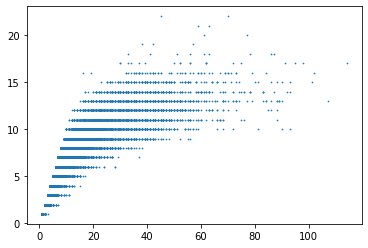

In [59]:
plt.scatter(pass_barca_count.values, player_barca_count.values, s = 0.5)

In [60]:
# KEEP THIS PLOT for VIS

In [61]:
barcelona.groupby(['idx', 'player_name'])['level_0'].count()

idx      player_name                   
10429    Andrés Iniesta Luján              1
         Daniel Alves da Silva             1
         Gerard Piqué Bernabéu             2
         Ivan Rakitić                      1
         Javier Alejandro Mascherano       1
                                          ..
3965564  Ivan Rakitić                      1
         Lionel Andrés Messi Cuccittini    2
         Luis Alberto Suárez Díaz          2
         Neymar da Silva Santos Junior     2
         Sergi Roberto Carnicer            1
Name: level_0, Length: 197734, dtype: int64

In [ ]:
barcelona.groupby(['idx', 'player_name'])['level_0'].count()

In [62]:
one_each.head(5)

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
1,8,Pass,Birmingham City WFC,From Kick Off,Birmingham City WFC,2275050,71905fc2-e4fb-4429-8f44-11c3942ade7d,9,1,00:00:02.582,...,High Pass,NaN,Right Foot,118.4,72.9,52.8,42.7,11,Miscontrol,Lucy Staniforth
5,30,Pass,Reading WFC,From Goal Kick,Reading WFC,2275050,8138a7e3-98a7-4903-a589-a2906ffd27bb,31,1,00:01:19.013,...,High Pass,NaN,Right Foot,56.7,64.5,61.1,62.7,31,Duel,Angharad James
7,38,Pass,Birmingham City WFC,From Free Kick,Birmingham City WFC,2275050,f4e18de1-9498-40e5-8134-52576c00b8a1,39,1,00:01:33.201,...,High Pass,Free Kick,Right Foot,92.5,54.5,64.3,18.3,45,Pressure,Lucy Staniforth
12,57,Pass,Reading WFC,Regular Play,Reading WFC,2275050,3b465518-63fd-401b-9b8f-3b8055d1c20b,58,1,00:01:56.055,...,Ground Pass,NaN,Right Foot,57.7,59.7,42.3,65.6,58,Ball Receipt*,Sophie Howard
14,67,Pass,Birmingham City WFC,Regular Play,Birmingham City WFC,2275050,bf5cd3fa-1477-443f-a17f-dca4c31ba815,68,1,00:02:01.373,...,Ground Pass,NaN,Right Foot,89.0,14.1,86.8,17.4,72,Pressure,Abbi Grant


In [64]:
oe_barcelona = one_each[one_each.get('possession_team_name') == 'Barcelona']
oe_barcelona

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
2674,10417,Pass,Barcelona,Regular Play,Barcelona,265958,0e5d4216-9898-4165-929e-731354c59f87,41,1,00:00:39.763,...,Ground Pass,NaN,Right Foot,77.4,11.8,77.7,6.9,10429,Carry,Neymar da Silva Santos Junior
2718,10585,Pass,Barcelona,Regular Play,Barcelona,265958,926bae89-15dd-4483-ab32-50ff4c4a7d05,209,1,00:03:31.825,...,Ground Pass,NaN,Right Foot,15.3,40.3,23.9,26.5,10588,Pass,Ivan Rakitić
2728,10612,Pass,Barcelona,Regular Play,Barcelona,265958,3d80a3e4-0f61-4a6e-8cba-eb15fc266dfe,236,1,00:04:51.671,...,Ground Pass,NaN,Right Foot,100.1,21.7,96.2,6.5,10613,Ball Receipt*,Neymar da Silva Santos Junior
2760,10712,Pass,Barcelona,From Throw In,Barcelona,265958,1abffcb3-34e9-4a1e-bd7d-eb3521f6cffb,336,1,00:06:34.869,...,Ground Pass,NaN,Left Foot,96.2,47.1,83.6,27.5,10719,Goal Keeper,Jordi Alba Ramos
2773,10752,Pass,Barcelona,Regular Play,Barcelona,265958,cffe9bb7-9df1-4144-81a2-ec2560519a20,376,1,00:09:06.129,...,Ground Pass,NaN,Right Foot,119.4,25.0,91.8,6.9,10753,Ball Receipt*,Neymar da Silva Santos Junior
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096629,3965387,Pass,Barcelona,Regular Play,Barcelona,266033,e888f1b6-2f4d-411d-9c8d-fc71fe007a92,3504,2,00:41:56.593,...,High Pass,NaN,Left Foot,101.2,11.7,52.9,39.7,3965392,Foul Won,Ivan Rakitić
1096641,3965439,Pass,Barcelona,From Free Kick,Barcelona,266033,ed0fc90d-98f1-4124-bc88-65fe9c0f0f62,3556,2,00:44:25.863,...,High Pass,NaN,Right Foot,106.0,22.0,104.3,19.5,3965444,Carry,Neymar da Silva Santos Junior
1096650,3965477,Pass,Barcelona,From Free Kick,Barcelona,266033,1bb5d09f-b5ad-4a5b-94b8-beb97bf71707,3594,2,00:45:11.986,...,High Pass,NaN,Right Foot,115.5,55.6,97.6,21.4,3965480,Miscontrol,Neymar da Silva Santos Junior
1096658,3965506,Pass,Barcelona,Regular Play,Barcelona,266033,43a868d8-936b-47be-a6ee-6c4d15ac17f8,3623,2,00:46:05.653,...,Low Pass,NaN,Right Foot,88.4,15.7,78.9,47.4,3965509,Pressure,Sergio Busquets i Burgos


In [68]:
one_each.get('type_name_y').value_counts()

Carry                30634
Ball Receipt*        27636
Goal Keeper          14414
Pressure             13510
Pass                  8120
Miscontrol            7781
Duel                  6755
Foul Won              6732
Ball Recovery         2919
Block                 2727
Substitution          2451
Clearance             2082
Camera On             1459
Half Start            1348
Interception           928
Injury Stoppage        657
Foul Committed         637
Tactical Shift         622
Dribble                447
Shield                 342
Player Off             252
Offside                242
Bad Behaviour          240
Referee Ball-Drop      156
Player On              139
50/50                   74
Own Goal Against        51
Own Goal For            49
Camera off              24
Error                   10
Shot                     5
Name: type_name_y, dtype: int64

In [65]:
oe_barcelona_index_type = oe_barcelona[['idx', 'type_name_y']]
oe_barcelona_index_type

,idx,type_name_y
2674,10429,Carry
2718,10588,Pass
2728,10613,Ball Receipt*
2760,10719,Goal Keeper
2773,10753,Ball Receipt*
...,...,...
1096629,3965392,Foul Won
1096641,3965444,Carry
1096650,3965480,Miscontrol
1096658,3965509,Pressure


In [67]:
oe_barcelona_index_type['type_name_y'].value_counts()

Carry                6667
Ball Receipt*        6205
Goal Keeper          4410
Pressure             3071
Foul Won             1734
Miscontrol           1598
Duel                 1435
Pass                 1298
Substitution          752
Ball Recovery         714
Block                 681
Clearance             466
Half Start            342
Interception          294
Foul Committed        192
Injury Stoppage       176
Tactical Shift        166
Dribble               155
Camera On             152
Bad Behaviour          98
Offside                86
Player Off             63
Shield                 63
Referee Ball-Drop      35
Player On              27
Own Goal For           21
50/50                  19
Own Goal Against       15
Camera off              3
Shot                    1
Error                   1
Name: type_name_y, dtype: int64

In [69]:
def find_field_section(x):
            if x < 40:
                return 'Defending Third'
            elif x > 80:
                return 'Attacking Third'
            else:
                return 'Middle Third'

In [71]:
find_field_section(0)

'Defending Third'

In [72]:
barcelona.head(5)

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
2662,10385,Pass,Barcelona,Regular Play,Barcelona,265958,e97ecc5e-c15f-47af-8d3b-32af0c55ef3a,9,1,00:00:06.083,...,Low Pass,Recovery,Right Foot,35.6,3.4,56.1,6.5,10429,Carry,Neymar da Silva Santos Junior
2663,10388,Pass,Barcelona,Regular Play,Barcelona,265958,7abe637c-cf0c-4542-90d7-734efb64b117,12,1,00:00:09.814,...,Ground Pass,NaN,Left Foot,19.8,11.0,32.9,5.9,10429,Carry,Jordi Alba Ramos
2664,10392,Pass,Barcelona,Regular Play,Barcelona,265958,3a34c87d-62b3-4882-9534-eb58e305fd80,16,1,00:00:12.066,...,High Pass,NaN,Right Foot,14.0,47.8,19.4,13.3,10429,Carry,Javier Alejandro Mascherano
2665,10395,Pass,Barcelona,Regular Play,Barcelona,265958,58a5c756-71f9-43c9-b494-3666e6aa723a,19,1,00:00:16.506,...,Ground Pass,NaN,Right Foot,19.8,75.1,4.4,57.8,10429,Carry,Gerard Piqué Bernabéu
2666,10398,Pass,Barcelona,Regular Play,Barcelona,265958,8772dc6c-83f4-4239-a03f-146f383a7f2c,22,1,00:00:19.227,...,Ground Pass,NaN,Right Foot,3.4,65.5,19.8,72.0,10429,Carry,Daniel Alves da Silva


In [75]:
barcelona.drop_duplicates(subset = 'idx', keep = 'last').head(5)

,level_0,type_name_x,possession_team_name,play_pattern_name,team_name,match_id,id,index,period,timestamp,...,pass_height_name,pass_type_name,pass_body_part_name,pass_end_location_x,pass_end_location_y,location_x,location_y,idx,type_name_y,player_name
2674,10417,Pass,Barcelona,Regular Play,Barcelona,265958,0e5d4216-9898-4165-929e-731354c59f87,41,1,00:00:39.763,...,Ground Pass,NaN,Right Foot,77.4,11.8,77.7,6.9,10429,Carry,Neymar da Silva Santos Junior
2718,10585,Pass,Barcelona,Regular Play,Barcelona,265958,926bae89-15dd-4483-ab32-50ff4c4a7d05,209,1,00:03:31.825,...,Ground Pass,NaN,Right Foot,15.3,40.3,23.9,26.5,10588,Pass,Ivan Rakitić
2719,10588,Pass,Barcelona,Regular Play,Barcelona,265958,e4688377-f62c-4a2f-81a8-061516d0700c,212,1,00:03:35.347,...,High Pass,NaN,Right Foot,50.4,79.9,14.7,44.8,10591,Pressure,Gerard Piqué Bernabéu
2728,10612,Pass,Barcelona,Regular Play,Barcelona,265958,3d80a3e4-0f61-4a6e-8cba-eb15fc266dfe,236,1,00:04:51.671,...,Ground Pass,NaN,Right Foot,100.1,21.7,96.2,6.5,10613,Ball Receipt*,Neymar da Silva Santos Junior
2760,10712,Pass,Barcelona,From Throw In,Barcelona,265958,1abffcb3-34e9-4a1e-bd7d-eb3521f6cffb,336,1,00:06:34.869,...,Ground Pass,NaN,Left Foot,96.2,47.1,83.6,27.5,10719,Goal Keeper,Jordi Alba Ramos


In [81]:
lastEv['last_locs'] = lastEv['pass_end_location_x'].transform(find_field_section)

In [82]:
utah_royals = lastEv[lastEv.get('possession_team_name') == 'Utah Royals']

In [83]:
utah_royals.groupby('idx')['pass_recipient_name'].nunique()

idx
1108741    1
1108768    0
1108804    9
1108875    7
1108917    7
          ..
3915008    2
3915042    0
3915064    0
3915115    4
3915147    2
Name: pass_recipient_name, Length: 746, dtype: int64

In [84]:
utah_royals.groupby('idx')['level_0'].count()

idx
1108741     1
1108768     1
1108804    11
1108875     8
1108917     8
           ..
3915008     3
3915042     1
3915064     1
3915115    13
3915147     3
Name: level_0, Length: 746, dtype: int64

In [93]:
indexes = utah_royals.drop_duplicates(subset = 'idx', keep = 'last')[['idx', 'last_locs']]

In [95]:
indexes.set_index('idx')

,last_locs
idx,
1108741,Middle Third
1108768,Attacking Third
1108804,Attacking Third
1108875,Middle Third
1108917,Middle Third
...,...
3915008,Middle Third
3915042,Attacking Third
3915064,Attacking Third


In [88]:
indexes.shape

(746,)

In [89]:
indexes.index

Int64Index([ 307280,  307281,  307300,  307320,  307332,  307340,  307354,
             307376,  307410,  307427,
            ...
            1082844, 1082854, 1082855, 1082861, 1082866, 1082872, 1082873,
            1082885, 1082904, 1082914],
           dtype='int64', length=746)